<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

**Esercizio 1: Cross-Validation**

- implementare KFold senza utilizzare la libreria sklearn

**Esercizio 2: Customer Churn**

- Che cosa è la *customer churn*? Comprendilo al meglio in max 5 minuti utilizzando Google!

Una volta che hai terminato la tua ricerca affronta il seguente problema:

Sono il tuo capo e tu sei un junior data scientist. La nostra società ha un grosso problema di customer churn. In che modo puoi usare le tue skill per risolvere il problema? Scrivi per iscritto la tua risposta specificando quale tipo di modello e di algoritmo di ML utilizzeresti e perché per risolvere la situazione.

**Esercizio 1:**

In [1]:
import numpy as np

In [2]:
def kfold(X, y, k, shuffle=True):
    """
    Generates K folds for K-Fold Cross-Validation.
    
    Parameters:
    X: array-like, shape (n_samples, n_features)
        The data to be split into folds.
    y: array-like, shape (n_samples,)
        The target values for the data.
    k: int
        The number of folds.
    shuffle: bool (default: True)
        Whether to shuffle the data before splitting into folds.
        
    Returns:
    folds: list of tuples
        Each tuple contains the train and test indices for a fold.
    """
    n_samples = X.shape[0]
    
    # Shuffle the data if needed
    if shuffle:
        indices = np.random.permutation(n_samples)
        X = X[indices]
        y = y[indices]
    
    # Calculate the size of each fold
    fold_size = n_samples // k
    
    # Initialize the folds list
    folds = []
    
    # Split the data into k folds
    for i in range(k):
        # Determine the start and end indices of the fold
        start = i * fold_size
        end = (i + 1) * fold_size
        
        # Check if this is the last fold
        if i == k - 1:
            # If this is the last fold, include all remaining samples
            end = n_samples
        
        # Append the train and test indices for this fold to the folds list
        folds.append((np.concatenate((indices[:start], indices[end:])), indices[start:end]))
    
    return folds


Esempio di applicazione della funzione kfold

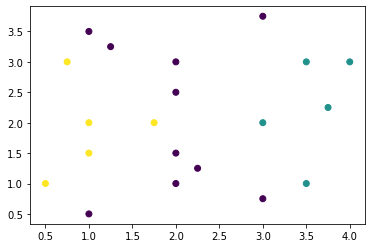

In [3]:
import matplotlib.pyplot as plt

# Generate some toy data
X = np.array([[1.0, 0.5], [2.0, 1.0], [2.0, 1.5], [3.0, 0.75], [2.25, 1.25],
              [1.0, 3.5], [2.0, 3.0], [2.0, 2.5], [3.0, 3.75], [1.25, 3.25],
              [3.0, 2.0], [3.5, 3.0], [3.5, 1.0], [4.0, 3.0], [3.75, 2.25],
              [1.0, 2.0], [1.0, 1.5], [0.5, 1.0], [0.75, 3.0], [1.75, 2.0]])

y = np.array([1, 1, 1, 1, 1,
              1, 1, 1, 1, 1,
              2, 2, 2, 2, 2,
              3, 3, 3, 3, 3])

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

In [4]:
from sklearn.ensemble import RandomForestClassifier

# Define the number of folds
k = 5

# Generate the folds
folds = kfold(X, y, k)

# Define the model
model = RandomForestClassifier()

# Initialize a list to store the evaluation scores
scores = []

# Iterate over the folds
for i, (train_indices, test_indices) in enumerate(folds):
    # Split the data into train and test sets
    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]
    
    # Train the model on the training data
    model.fit(X_train, y_train)
    
    # Evaluate the model on the test data
    score = model.score(X_test, y_test)
    print(f"fold N: {i}, accuracy: {score}")
    
    # Append the evaluation score to the scores list
    scores.append(score)

# Calculate the mean and standard deviation of the scores
mean_score = np.mean(scores)
std_dev = np.std(scores)

print(f"Mean accuracy: {mean_score:.2f}")


fold N: 0, accuracy: 0.75
fold N: 1, accuracy: 0.5
fold N: 2, accuracy: 0.25
fold N: 3, accuracy: 0.5
fold N: 4, accuracy: 0.5
Mean accuracy: 0.50


**Esercizio 2:**

Il **customer churn**, noto anche come customer attrition, è un termine usato nel mondo degli affari per descrivere la perdita di clienti in un certo periodo di tempo. In genere viene misurato come la percentuale di clienti che smettono di fare affari con un'azienda entro un determinato periodo di tempo. Ad esempio, se un'azienda ha 100 clienti e 10 di loro smettono di fare affari con l'azienda entro un anno, il tasso di abbandono dei clienti dell'azienda per quell'anno sarebbe del 10%.

Il tasso di abbandono dei clienti è una metrica importante da monitorare per le aziende perché può avere un impatto significativo sulle entrate e sulla redditività di un'azienda. Le aziende che registrano alti livelli di abbandono dei clienti potrebbero dover trovare modi per migliorare i propri prodotti o servizi, aumentare la soddisfazione dei clienti o affrontare altri problemi che stanno causando l'abbandono dei clienti. Comprendendo i fattori che contribuiscono al tasso di abbandono dei clienti, le aziende possono sviluppare strategie per ridurre il tasso di abbandono e fidelizzare i propri clienti.

*Sono il tuo capo e tu sei un junior data scientist. La nostra società ha un grosso problema di customer churn. In che modo puoi usare le tue skill per risolvere il problema? Scrivi per iscritto la tua risposta specificando quale tipo di modello e di algoritmo di ML utilizzeresti e perché per risolvere la situazione.*

Innanzitutto, raccoglierei e analizzerei i dati sul tasso di abbandono dei nostri clienti e tutti i fattori rilevanti che potrebbero contribuirvi. Ciò potrebbe includere dati sui dati demografici dei clienti, comportamento di acquisto, utilizzo del prodotto, livelli di soddisfazione e altri fattori che potrebbero essere rilevanti per la fidelizzazione dei clienti.

Successivamente, utilizzerei questi dati per costruire un modello predittivo in grado di identificare i clienti a rischio di abbandono. A seconda della natura dei dati e del problema specifico in questione, potrei consigliare di utilizzare un modello di classificazione come un albero decisionale, una random forest o una regressione logistica. Questi modelli sono adatti per prevedere risultati binari (come abbandono o non abbandono) e possono gestire un'ampia varietà di funzioni di input.

Una volta sviluppato un modello predittivo, lo userei per identificare i clienti a rischio di abbandono e dare loro la priorità per gli sforzi di fidelizzazione. Ciò potrebbe comportare campagne di marketing mirate, promozioni speciali o altre strategie per incoraggiare questi clienti a continuare a comprare dalla nostra azienda.

Per migliorare ulteriormente i nostri sforzi di fidelizzazione dei clienti, consiglierei anche di implementare un processo di miglioramento continuo per monitorare l'efficacia dei nostri sforzi di fidelizzazione e apportare modifiche continue secondo necessità. Ciò potrebbe comportare una valutazione regolare delle prestazioni del nostro modello predittivo e il suo utilizzo per identificare nuovi fattori di rischio o sviluppare nuove strategie di conservazione.

Nel complesso, credo che l'utilizzo di tecniche di apprendimento automatico come la modellazione predittiva possa essere un modo efficace per affrontare il tasso di abbandono dei clienti e migliorare i tassi di fidelizzazione. Sfruttando dati e algoritmi avanzati, possiamo identificare i clienti a rischio di abbandono e intraprendere azioni mirate per fidelizzarli.